/tmp/ipykernel_9400/2945505390.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette='viridis')


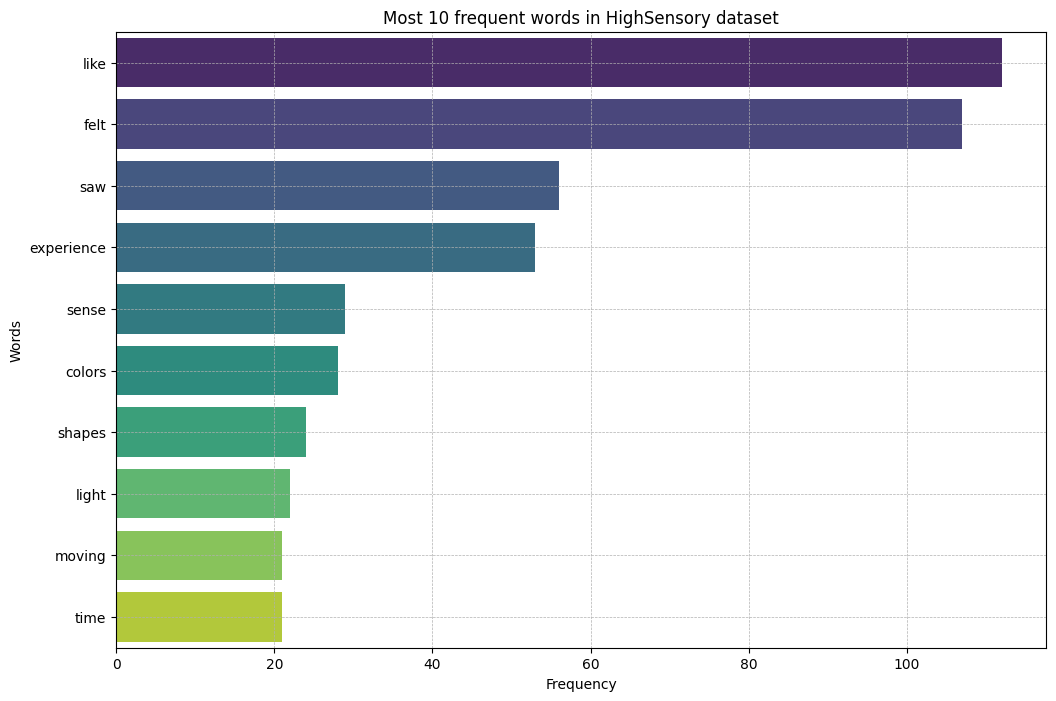

/tmp/ipykernel_9400/2945505390.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette='viridis')


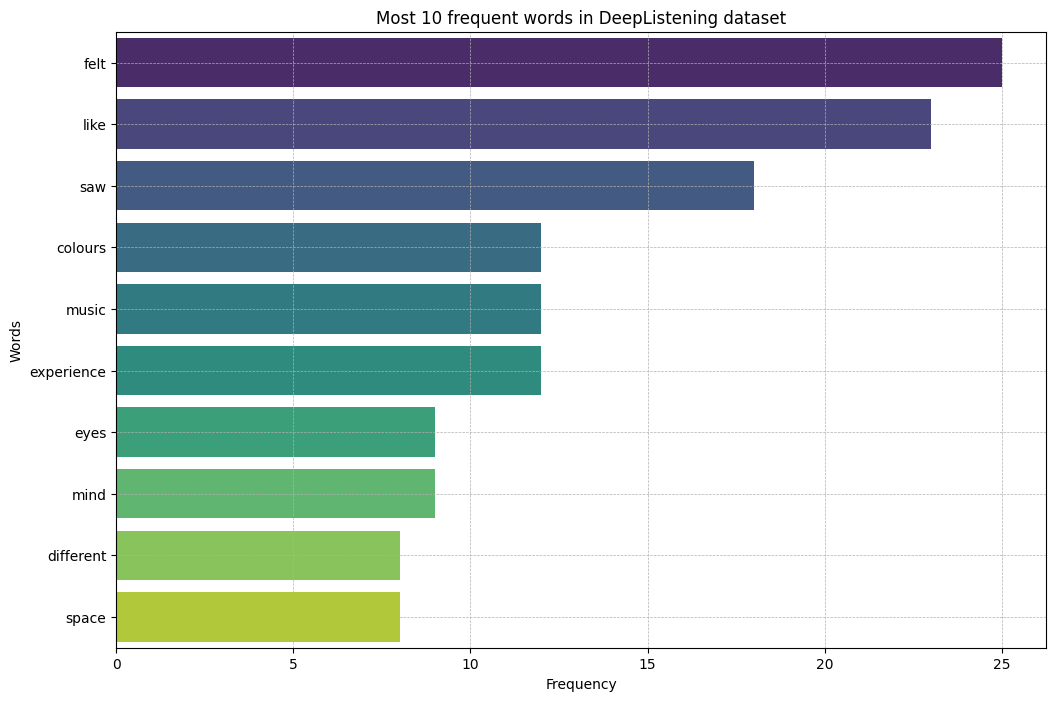

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

num_words = 10


def frequent_non_stopwords(data, num_words=num_words):
    all_words = Counter()
    for entry in data:
        tokens = [token.lower() for token in entry.split() if token.lower() not in ENGLISH_STOP_WORDS]
        all_words.update(tokens)
    return all_words.most_common(num_words)

def plot_word_frequencies(word_counts, title):
    words, frequencies = zip(*word_counts)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=frequencies, y=words, palette='viridis')  
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(title)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


files = {
    'HighSensory': 'HS_reflections_cleaned.csv',
    'DeepListening': 'DL_reflections_cleaned.csv'
    # 'HandWritten': 'preprocessed_HandWritten.csv'
}

for name, file_path in files.items():
    data = pd.read_csv(file_path,sep='\t')['reflection_answer']
    word_counts = frequent_non_stopwords(data)
    plot_word_frequencies(word_counts, f'Most {num_words} frequent words in {name} dataset')



We then use histograms and Kernel Density Estimation (KDE) plots to visualize the distribution of these words across the documents. These plots provide insights into the spread and concentration of word occurrences, helping to decide whether to include them as stopwords based on their distribution characteristics.

Analyzing dataset: HighSensory


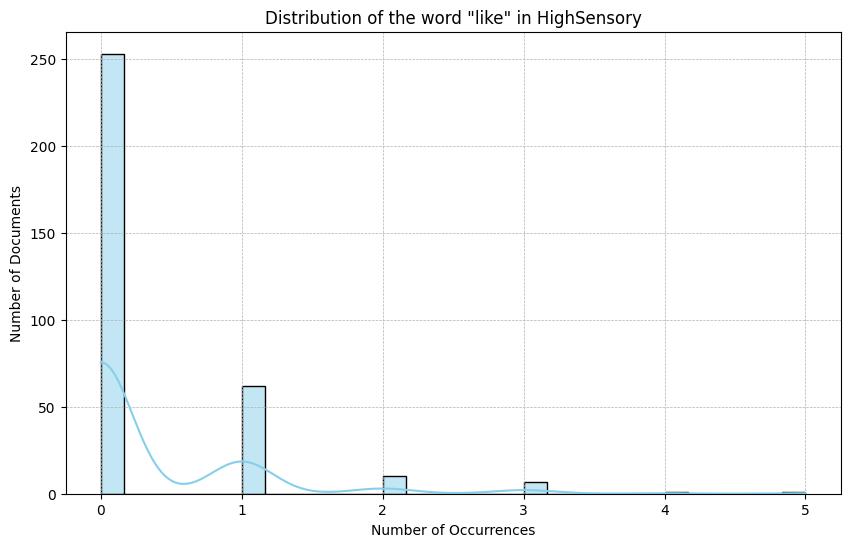

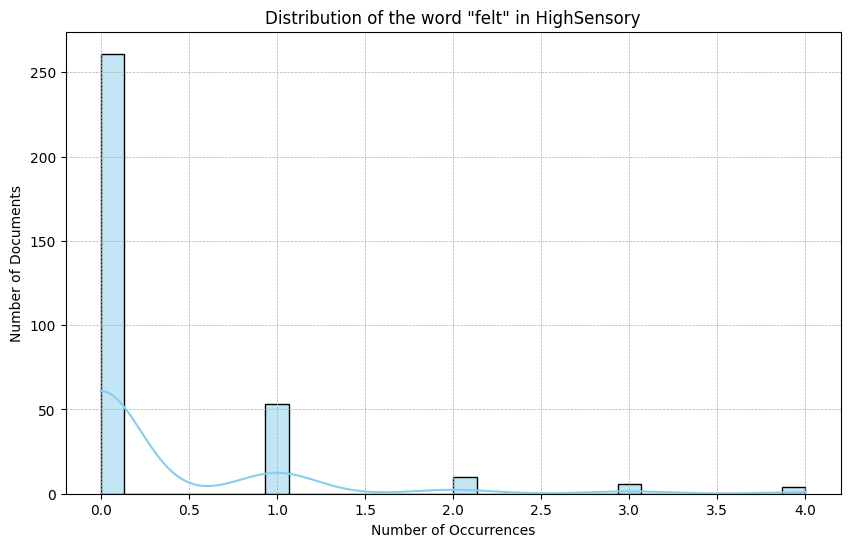

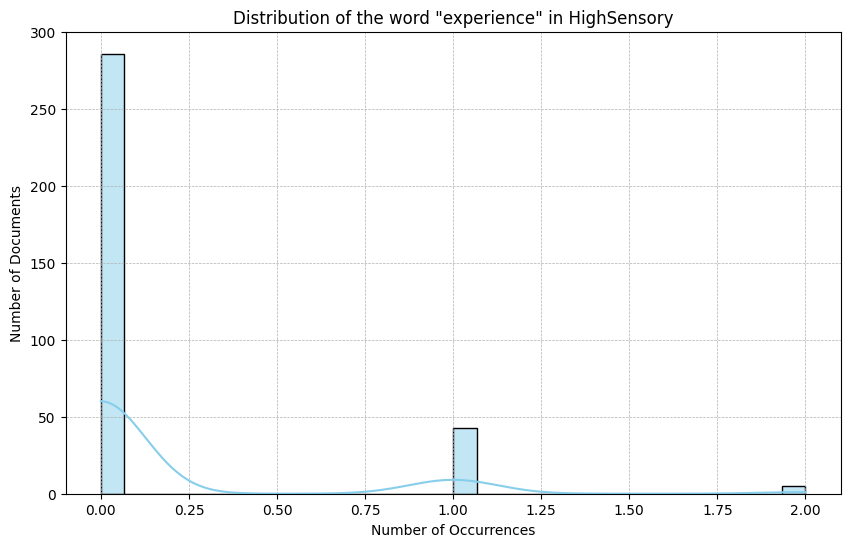

Analyzing dataset: DeepListening


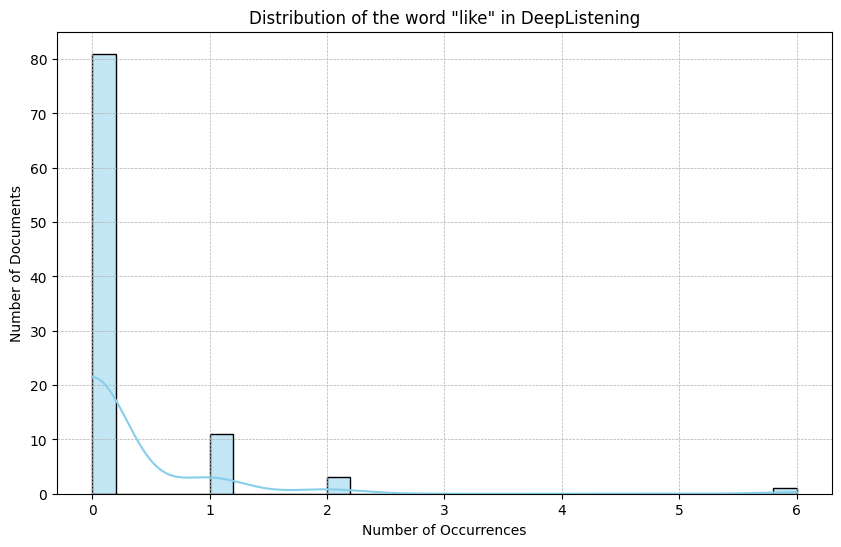

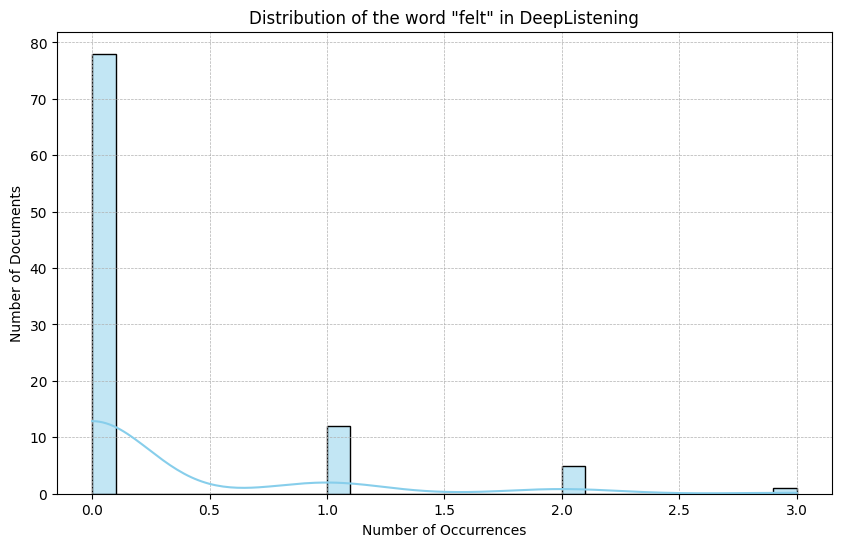

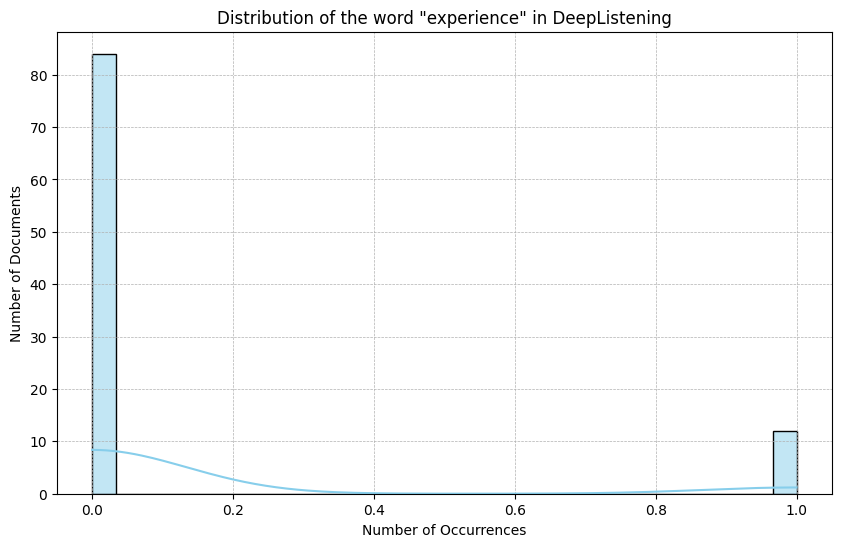

In [12]:

def word_distribution(data, word):
    # Count occurrences of the word in each document
    word_counts = [entry.lower().split().count(word) for entry in data]
    return word_counts

def plot_distribution(counts, word, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(counts, bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of the word "{word}" in {title}')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Number of Documents')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


# top 3 wordsto check manually based on previous analysis
top_words = ['like', 'felt', 'experience']  # Update this list based on your actual top words

for name, file_path in files.items():
    data = pd.read_csv(file_path,sep='\t')['reflection_answer']
    print(f"Analyzing dataset: {name}")
    for word in top_words:
        counts = word_distribution(data, word)
        plot_distribution(counts, word, name)
